Data Pre-Processing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/422 Data Set/CSE422 project software_quality_dataset - software_quality_dataset.csv')

data.head(3)

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
0,356.0,31,144,69.567047,0.467561,2,Yes,4,Medium
1,227.0,15,104,131.844422,0.795643,2,No,5,High
2,9674.0,47,141,118.729027,0.316839,5,No,1,High


In [ ]:
data.isnull().sum()

,0
Lines_of_Code,80
Cyclomatic_Complexity,0
Num_Functions,0
Code_Churn,80
Comment_Density,80
Num_Bugs,0
Has_Unit_Tests,0
Code_Owner_Experience,0
Quality_Label,0


Row delete

In [ ]:
# Check how many values are missing in the Lines_of_Code column
print("Number of rows with null values in 'Lines_of_Code' column: ", data['Lines_of_Code'].isnull().sum())

# Subset the data dataset
data_subset1 = data[data['Lines_of_Code'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", data_subset1.shape)
# Check how many values are missing in the Code_Churn column
print("Number of rows with null values in Code_Churn column: ", data_subset1['Code_Churn'].isnull().sum())

# Subset the data dataset
data_subset2 = data_subset1[data_subset1['Code_Churn'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", data_subset2.shape)

# Check how many values are missing in the Comment_Density column
print("Number of rows with null values in Comment_Density column: ", data_subset1['Comment_Density'].isnull().sum())

# Subset the data dataset
data_subset3 = data_subset2[data_subset1['Comment_Density'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", data_subset3.shape)

Number of rows with null values in 'Lines_of_Code' column:  80
Shape after removing null values:  (1520, 9)
Number of rows with null values in Code_Churn column:  76
Shape after removing null values:  (1444, 9)
Number of rows with null values in Comment_Density column:  77
Shape after removing null values:  (1371, 9)


/tmp/ipython-input-2829260104.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_subset3 = data_subset2[data_subset1['Comment_Density'].notnull()]


Label Encoding (Code_Owner_Experience)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Code_Owner_Experience" column
data_subset3['Code_Owner_Experience_enc'] = enc.fit_transform(data_subset3['Code_Owner_Experience'])

# Compare the two columns
print(data_subset3[['Code_Owner_Experience', 'Code_Owner_Experience_enc']].head())



   Code_Owner_Experience  Code_Owner_Experience_enc
0                      4                          3
1                      5                          4
2                      1                          0
3                      3                          2
4                      8                          7


/tmp/ipython-input-2713245105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset3['Code_Owner_Experience_enc'] = enc.fit_transform(data_subset3['Code_Owner_Experience'])


One-Hot Encoding ( Has_Unit_Tests )

In [ ]:
# One Hot Encoding for Has_Unit_Tests
data= pd.get_dummies(data_subset3, columns=['Has_Unit_Tests'], drop_first=True)

In [ ]:
print(data)

      Lines_of_Code  Cyclomatic_Complexity  Num_Functions  Code_Churn  \
0             356.0                     31            144   69.567047   
1             227.0                     15            104  131.844422   
2            9674.0                     47            141  118.729027   
3            6967.0                     42            107  194.397155   
4            7954.0                     35            114   69.202293   
...             ...                    ...            ...         ...   
1595         8883.0                     40             31   54.863010   
1596         2175.0                     44             25  160.802073   
1597         7872.0                     39             47  121.382316   
1598         9660.0                     24             55   75.626324   
1599         2122.0                      9             97   28.050954   

      Comment_Density  Num_Bugs  Code_Owner_Experience Quality_Label  \
0            0.467561         2                    

Data Spliting (Stratified)


In [ ]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(data['Quality_Label'])
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Quality_Label']), data['Quality_Label'], test_size = 0.2, random_state=0, stratify = y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1096, 9)
y_train shape: (1096,)
X_test shape: (275, 9)
y_test shape: (275,)


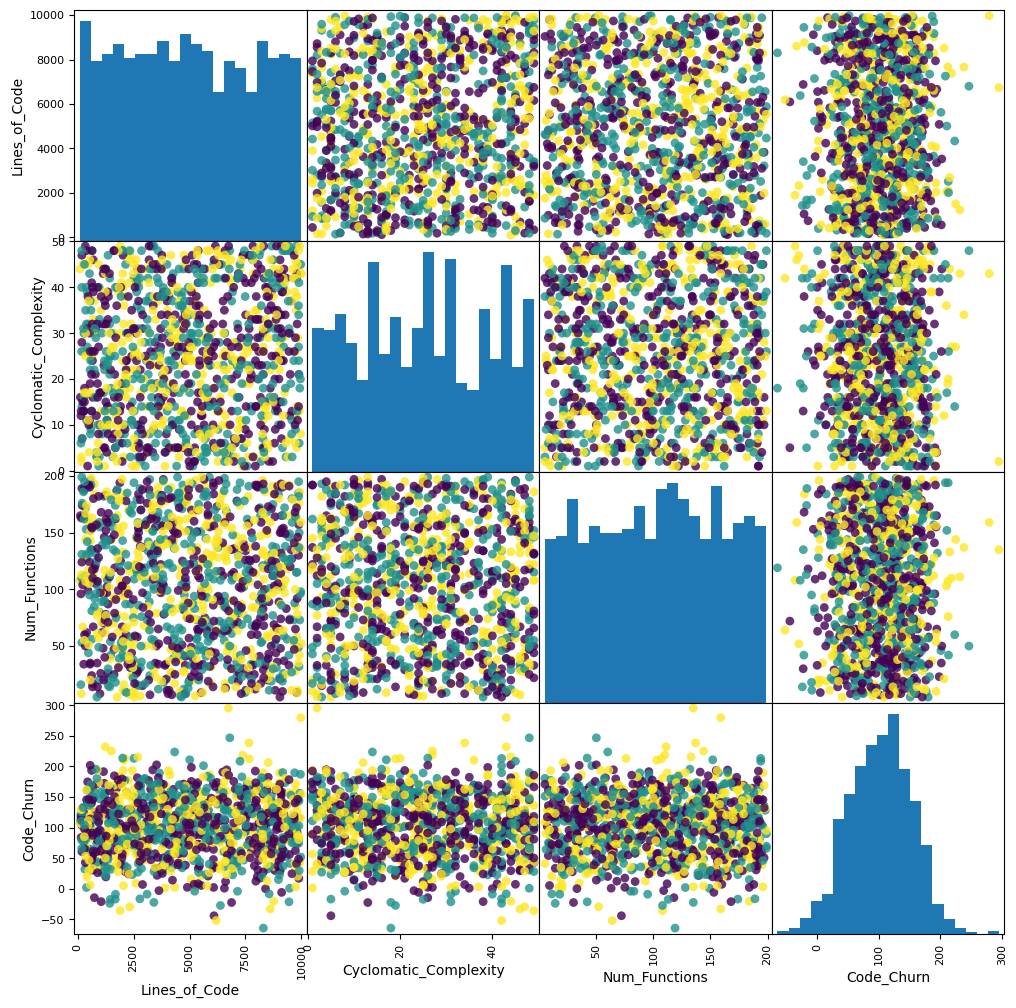

In [ ]:
# Create dataframe from X_train with correct column names
data = pd.DataFrame(X_train, columns=X_train.columns)

# Pick only a few features for scatter matrix
selected_features = ['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions', 'Code_Churn']
data_small = data[selected_features]

# Create scatter matrix
pd.plotting.scatter_matrix(data_small, c=y_train.astype('category').cat.codes,figsize=(12, 12),marker='o',hist_kwds={'bins': 20},s=40,alpha=0.8)

plt.show()

Model Training(KNN)


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)



#test
X_new = np.array([[356, 31, 144, 69.56, 0.46, 2, 1,0,1]])
print("X_new.shape:", X_new.shape)

#prediction(single input)
# Impute missing values in the new data point as well
X_new_imputed = imputer.transform(X_new)
prediction = knn.predict(X_new_imputed)
print("Prediction:", prediction)

# #prediction(entire test set)
y_pred = knn.predict(X_test_imputed)
print("Test set predictions:\n", y_pred)

X_new.shape: (1, 9)
Prediction: ['Medium']
Test set predictions:
 ['High' 'High' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'High' 'High' 'High'
 'High' 'High' 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Medium' 'Low'
 'High' 'Medium' 'High' 'High' 'Low' 'Low' 'Low' 'Low' 'High' 'High'
 'Medium' 'Low' 'High' 'Medium' 'High' 'Medium' 'Low' 'Medium' 'Low'
 'High' 'Medium' 'High' 'High' 'High' 'Low' 'High' 'Medium' 'High'
 'Medium' 'High' 'High' 'High' 'High' 'High' 'Medium' 'High' 'High' 'High'
 'Medium' 'Low' 'High' 'High' 'High' 'High' 'Medium' 'Low' 'Medium' 'Low'
 'High' 'High' 'Medium' 'High' 'Medium' 'Medium' 'High' 'High' 'High'
 'High' 'High' 'High' 'Low' 'Low' 'Medium' 'High' 'High' 'Medium' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'Low' 'Low' 'High' 'High'
 'High' 'Medium' 'Low' 'High' 'Low' 'High' 'High' 'High' 'Low' 'Medium'
 'High' 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Medium' 'Low' 'Medium' 'High' 'High' 'High' 'Hig

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Model Evaluation


In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy = %f " % (accuracy*100) + '%' )

Error = 60.000000 %
Accuracy = 40.000000 %


Model Training (Decision Tree)

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.36363636363636365

Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.36      0.36        96
         Low       0.36      0.38      0.37        93
      Medium       0.38      0.35      0.36        86

    accuracy                           0.36       275
   macro avg       0.36      0.36      0.36       275
weighted avg       0.36      0.36      0.36       275


Decision Tree Confusion Matrix:
 [[35 38 23]
 [32 35 26]
 [32 24 30]]


Manual Model evalation for decision tree

In [ ]:
# Model Evaluation for Decision Tree
count_dt = 0
for i in range(len(y_test)):
    if y_pred_dt[i] != y_test.iloc[i]:
        count_dt += 1
error_dt = count_dt / len(y_pred_dt)
print("Decision Tree Error = %f " % (error_dt * 100) + '%')
accuracy_dt = (1 - error_dt)
print("Decision Tree Accuracy = %f " % (accuracy_dt * 100) + '%')

Decision Tree Error = 63.636364 %
Decision Tree Accuracy = 36.363636 %


Neural Netwrok

Model training (NN)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np



# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy_mlp*100:.2f}%")

# You can also print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

Accuracy: 33.45%

Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.36      0.36        96
         Low       0.33      0.32      0.33        93
      Medium       0.32      0.31      0.32        86

    accuracy                           0.33       275
   macro avg       0.33      0.33      0.33       275
weighted avg       0.33      0.33      0.33       275


Confusion Matrix:
 [[35 33 28]
 [33 30 30]
 [31 28 27]]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


K-means

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
# Let's choose a number of clusters, for example 3, based on the 3 quality labels
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # Use the scaled and imputed training data

# Get the cluster labels
clusters = kmeans.labels_

# You can also get the cluster centers
cluster_centers = kmeans.cluster_centers_

print("Cluster labels:", clusters)
print("\nCluster centers:\n", cluster_centers)

Cluster labels: [1 2 0 ... 0 2 0]

Cluster centers:
 [[-2.78302249e-02 -1.41757852e-02 -5.09350868e-02  6.87595104e-02
   3.40294861e-03  1.64044231e-02 -8.06775091e-01 -8.06775091e-01
   1.02214291e+00]
 [ 2.36878956e-02 -1.75914181e-02 -3.49870120e-02 -8.61984717e-02
  -3.93210178e-03  1.84886950e-02 -8.06888423e-01 -8.06888423e-01
  -9.78336781e-01]
 [ 1.28178244e-03  1.84589168e-02  4.93812366e-02  1.34480166e-02
   4.65072025e-04 -2.02391806e-02  9.33894330e-01  9.33894330e-01
   1.79651101e-02]]


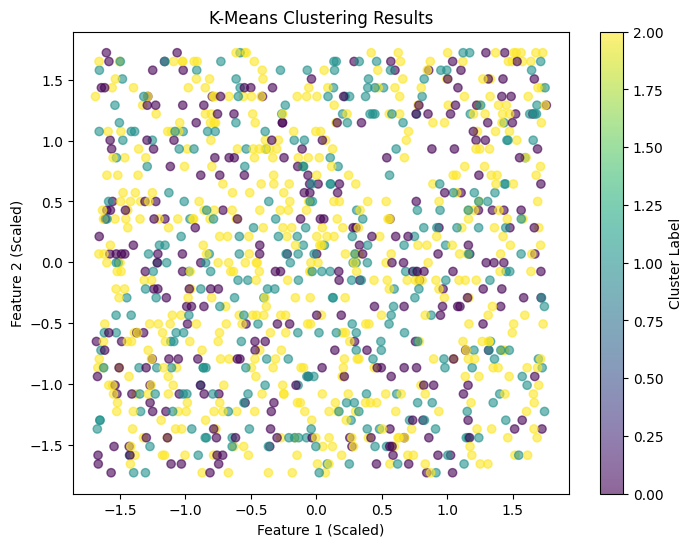

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Cluster Label')
plt.show()


### Model Comparison and Evaluation

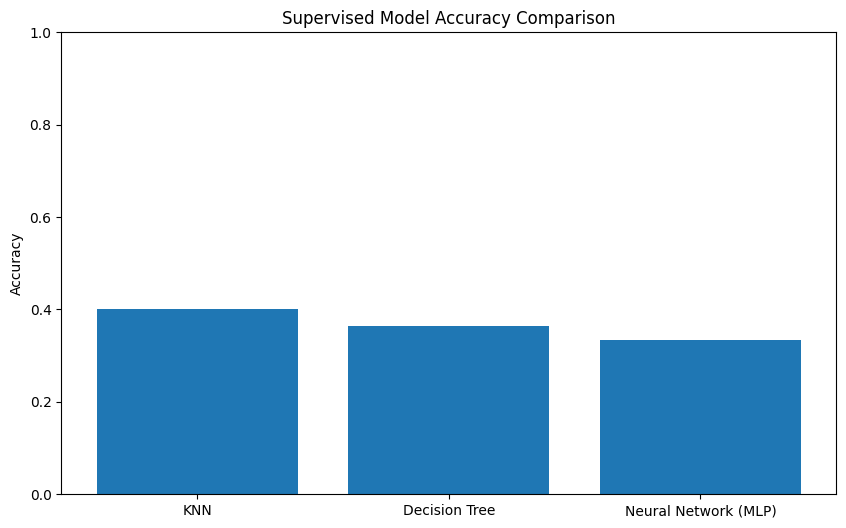

Supervised Model Accuracy Scores:
KNN: 0.4000
Decision Tree: 0.3636
Neural Network (MLP): 0.3345


In [ ]:
# Store accuracy scores in a dictionary
scores = {}

# KNN Accuracy (assuming you have `accuracy` variable from earlier KNN evaluation)
scores['KNN'] = accuracy

# Decision Tree Accuracy (assuming you have `accuracy_dt` variable from earlier Decision Tree evaluation)
scores['Decision Tree'] = accuracy_dt

# Neural Network (MLP) Accuracy (assuming you have `accuracy_mlp` variable from earlier MLP evaluation)
scores['Neural Network (MLP)'] = accuracy_mlp

# Create a bar chart to visualize accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values())
plt.ylabel('Accuracy')
plt.title('Supervised Model Accuracy Comparison') # Changed title
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.show()

print("Supervised Model Accuracy Scores:") # Changed title
for model, acc in scores.items():
    print(f"{model}: {acc:.4f}")



### Precision and Recall Comparison (Classification Report)

In [ ]:
# Print classification report for each model

print("KNN Classification Report:")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # Assuming y_pred is from KNN

print("\nDecision Tree Classification Report:")
# Assuming you have y_test and y_pred_dt from the Decision Tree model
print(classification_report(y_test, y_pred_dt))

print("\nNeural Network (MLP) Classification Report:")
# Assuming you have y_test and y_pred_mlp from the MLP model
print(classification_report(y_test, y_pred_mlp))

KNN Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.61      0.47        96
         Low       0.39      0.29      0.33        93
      Medium       0.48      0.28      0.35        86

    accuracy                           0.40       275
   macro avg       0.42      0.39      0.38       275
weighted avg       0.41      0.40      0.39       275


Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.36      0.36        96
         Low       0.36      0.38      0.37        93
      Medium       0.38      0.35      0.36        86

    accuracy                           0.36       275
   macro avg       0.36      0.36      0.36       275
weighted avg       0.36      0.36      0.36       275


Neural Network (MLP) Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.36      0.36        96
         Low       